In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Age of the Universe

In [2]:
from scipy.integrate import quad

def compute_fa(a, w0, wa):
    fa = a**(-3 * (1 + w0 + wa)) * np.exp(-3 * wa * (1 - a))
    return fa

def compute_Hubble(a, Omega_m, Omega_r, Omega_k, Omega_l, w0, wa):
    term_m = Omega_m * a**-3
    term_r = Omega_r * a**-4
    term_k = Omega_k * a**-2
    term_l = Omega_l * compute_fa(a, w0, wa)
    Hubble = np.sqrt(term_m + term_r + term_k + term_l)
    return Hubble

def integrand_age(a, Omega_m, Omega_r, Omega_k, Omega_l, w0, wa):
    H = compute_Hubble(a, Omega_m, Omega_r, Omega_k, Omega_l, w0, wa)
    return 1 / a / H

In [3]:
zini = 200
aini = 1/(zini+1)

h  = 0.72
H0 = 100*h # km/s/Mpc

Omega_m = 0.26
Omega_b = 0.044
Omega_r = 0.0
Omega_k = 0.0
Omega_l = 1 - Omega_m

In [4]:
age1, age_err1 = quad(integrand_age, 1e-10, 1, args=(Omega_m, Omega_r, Omega_k, Omega_l, -1.0,  0.0))
age2, age_err2 = quad(integrand_age, 1e-10, 1, args=(Omega_m, Omega_r, Omega_k, Omega_l, -1.2,  0.8))
age3, age_err3 = quad(integrand_age, 1e-10, 1, args=(Omega_m, Omega_r, Omega_k, Omega_l, -0.8, -0.8))

In [5]:
Mpc_to_km = 206265 * 1.496 * 1e14
invH0_to_sec = Mpc_to_km # H0 [km/s/Mpc] --> [km/s/km] --> [1/s] --> [1/Gyr]
invH0_to_Gyr = invH0_to_sec / 3600 / 24 / 365 / 1e9

unit_t = 1/H0 * invH0_to_Gyr
unit_t

13.58995539489261

In [6]:
print("[Age of the Universe]")
print(f"LCDM (w0, wa)=(-1.0,  0.0): {age1:f} [1/H0], {age1*unit_t:f} Gyr")
print(f"CPL1 (w0, wa)=(-1.2,  0.8): {age2:f} [1/H0], {age2*unit_t:f} Gyr")
print(f"CPL2 (w0, wa)=(-0.8, -0.8): {age3:f} [1/H0], {age3*unit_t:f} Gyr")

[Age of the Universe]
LCDM (w0, wa)=(-1.0,  0.0): 1.003014 [1/H0], 13.630920 Gyr
CPL1 (w0, wa)=(-1.2,  0.8): 1.003631 [1/H0], 13.639296 Gyr
CPL2 (w0, wa)=(-0.8, -0.8): 0.999787 [1/H0], 13.587058 Gyr


# Multiverse Nbody

In [7]:
# redshift
zout_nbody = np.loadtxt("./PreFoF.flag")
zout_nbody

array([1.1490023e+01, 9.7677110e+00, 8.5375360e+00, 7.6071830e+00,
       6.8745090e+00, 6.2798150e+00, 5.7856750e+00, 5.3673360e+00,
       5.0077160e+00, 4.6946140e+00, 4.4190630e+00, 4.1743130e+00,
       3.9551750e+00, 3.7575910e+00, 3.5783390e+00, 3.4148210e+00,
       3.2649220e+00, 3.1268980e+00, 2.9992970e+00, 2.8809010e+00,
       2.7706800e+00, 2.6677560e+00, 2.5713740e+00, 2.4808840e+00,
       2.3957200e+00, 2.3153890e+00, 2.2394590e+00, 2.1675490e+00,
       2.0993210e+00, 2.0344760e+00, 1.9727460e+00, 1.9138940e+00,
       1.8577030e+00, 1.8039820e+00, 1.7525550e+00, 1.7032660e+00,
       1.6559700e+00, 1.6105370e+00, 1.5668480e+00, 1.5247940e+00,
       1.4842750e+00, 1.4452010e+00, 1.4074860e+00, 1.3710540e+00,
       1.3358310e+00, 1.3017530e+00, 1.2687580e+00, 1.2367890e+00,
       1.2057930e+00, 1.1757200e+00, 1.1465260e+00, 1.1181670e+00,
       1.0906030e+00, 1.0637960e+00, 1.0377130e+00, 1.0123200e+00,
       9.8758600e-01, 9.6348200e-01, 9.3998100e-01, 9.1705800e

In [8]:
# scale factor
aout_nbody = 1/(zout_nbody+1)
snap_nbody = np.arange(len(aout_nbody))

<IPython.core.display.Javascript object>


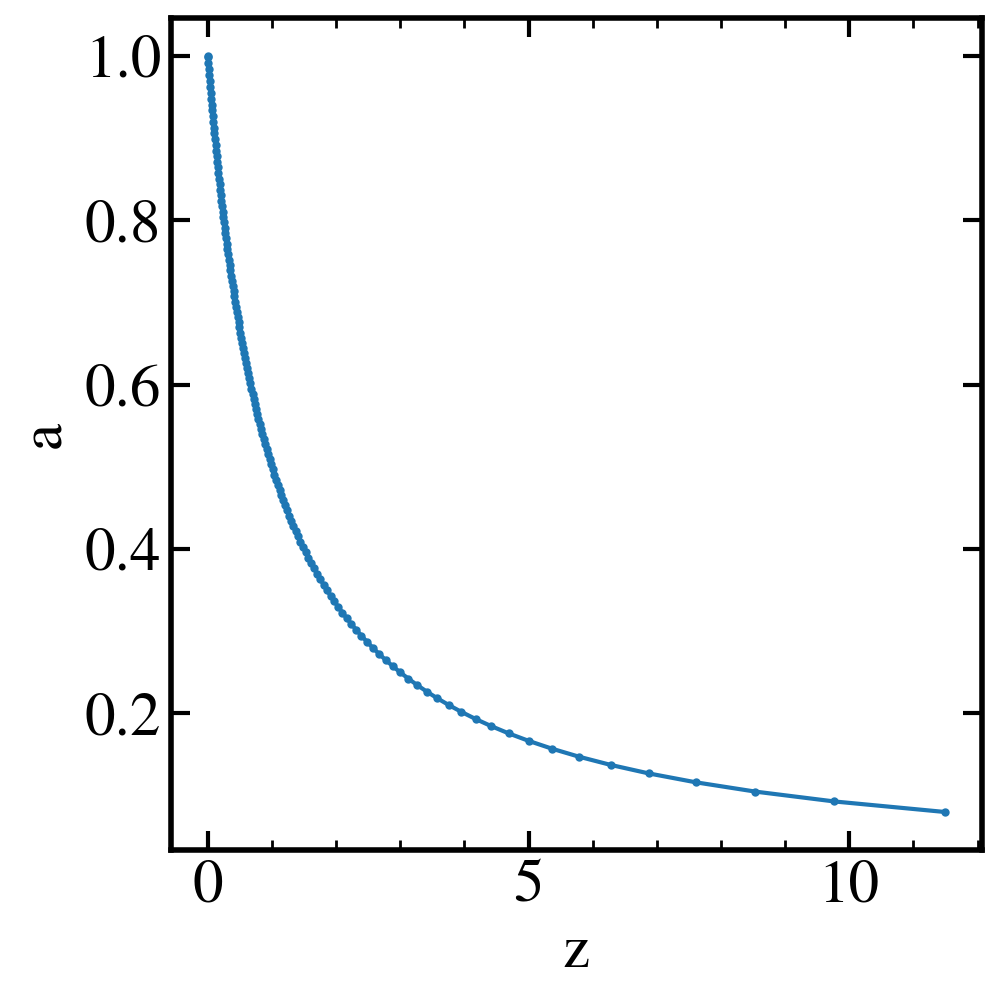

In [9]:
plt.figure(figsize=(5, 5))
plt.plot(zout_nbody, aout_nbody, 'o-', ms=2)
plt.xlabel("z")
plt.ylabel("a")
plt.tight_layout(pad=0.3)

# TNG

In [10]:
tng = pd.read_csv("./Table_TNG50-1.csv")

In [11]:
tng

,Snapshot\n[#],Redshift,Age\n[Gyr],Lookback\n[Gyr],Gas Cells\n[#],Stars\n[#],BHs\n[#],FoF\nGroups [#],Subfind\nGroups [#],Download \nSnapshot,Download \nFoF & Subfind,Download\nOffsets
0,0,20.05,0.179,13.624,10077543839,32972,0,35412,33157,[Snapshot] (1013.7 GB),[Groupcat] (68.1 MB),NaN
1,1,14.99,0.271,13.532,10071893231,350802,0,756234,689643,[Snapshot] (1013.4 GB),[Groupcat] (650.9 MB),NaN
2,2,11.98,0.370,13.433,10045762350,1048512,0,2776355,2420511,[Snapshot] (2.8 TB),[Groupcat] (2.2 GB),NaN
3,3,10.98,0.418,13.385,10025561598,1483071,1,3930392,3358010,[Snapshot] (2.8 TB),[Groupcat] (3.0 GB),NaN
4,4,10.00,0.475,13.328,9996304486,2129923,4,5280245,4421802,[Snapshot] (2.8 TB),[Groupcat] (4.0 GB),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.05,13.127,0.676,8755108332,1264516351,4040,10308436,5739720,[Snapshot] (1005.7 GB),[Groupcat] (5.9 GB),NaN
96,96,0.03,13.328,0.475,8749771474,1272215071,4072,10273666,5723981,[Snapshot] (1005.8 GB),[Groupcat] (5.9 GB),NaN
97,97,0.02,13.463,0.340,8746243655,1277242258,4055,10255188,5712997,[Snapshot] (1005.9 GB),[Groupcat] (5.9 GB),NaN
98,98,0.01,13.667,0.136,8741176521,1284694806,4028,10253596,5698054,[Snapshot] (1006.0 GB),[Groupcat] (5.9 GB),NaN


In [12]:
tng.keys()

Index(['Snapshot\n[#]', 'Redshift', 'Age\n[Gyr]', 'Lookback\n[Gyr]',
       'Gas Cells\n[#]', 'Stars\n[#]', 'BHs\n[#]', 'FoF\nGroups [#]',
       'Subfind\nGroups [#]', 'Download \nSnapshot',
       'Download \nFoF & Subfind', 'Download\nOffsets'],
      dtype='object')

In [13]:
zout_tng = tng["Redshift"].values
aout_tng = 1 / (zout_tng + 1)
tout_tng = tng["Lookback\n[Gyr]"].values
snap_tng = tng["Snapshot\n[#]"].values

# Check their output times

<IPython.core.display.Javascript object>


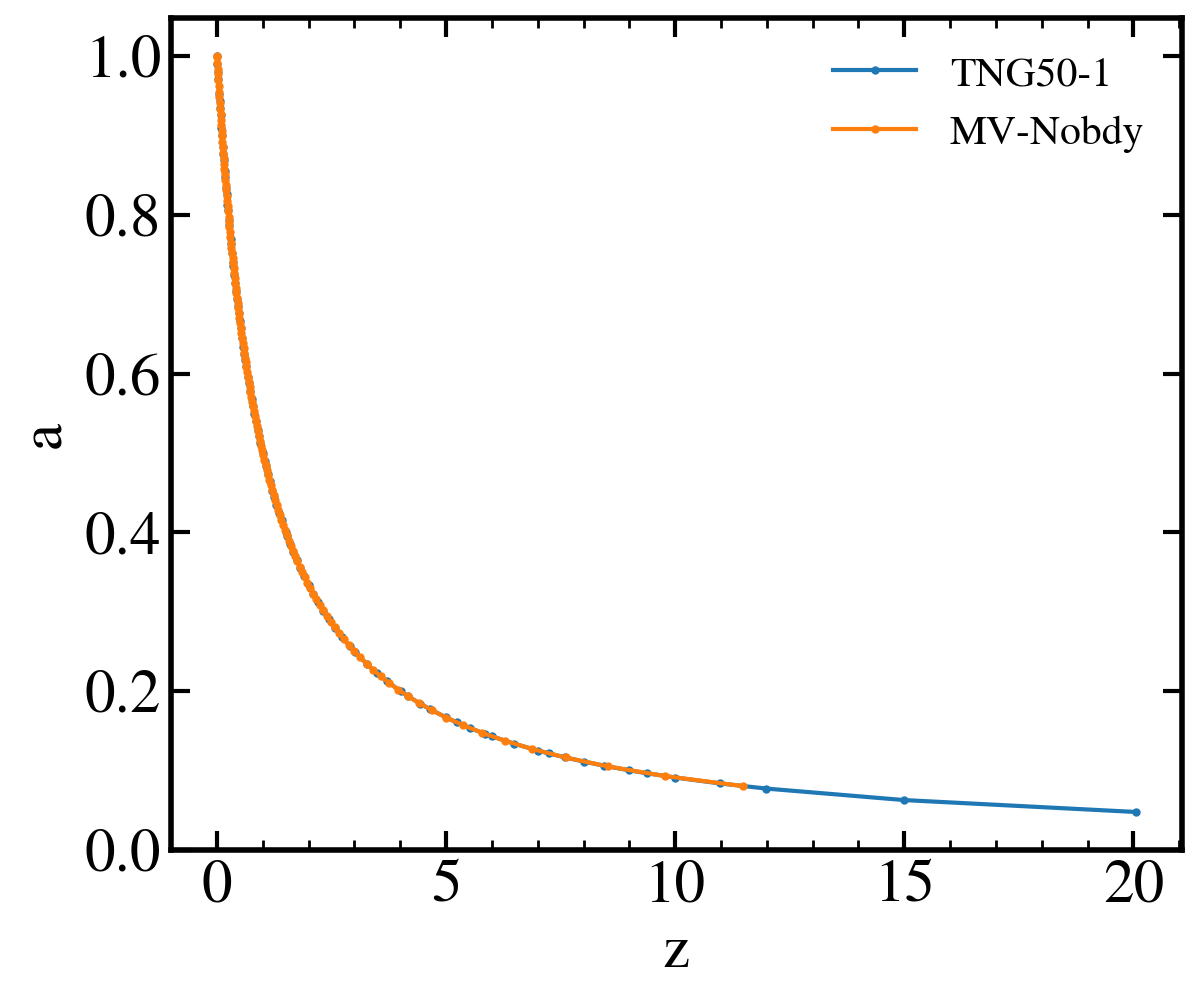

In [14]:
plt.figure(figsize=(6, 5))
plt.plot(zout_tng, aout_tng, 'o-', ms=2, label="TNG50-1")
plt.plot(zout_nbody, aout_nbody, 'o-', ms=2, label="MV-Nobdy")
plt.xlabel("z")
plt.ylabel("a")
# plt.xscale('log')
# plt.yscale('log')
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


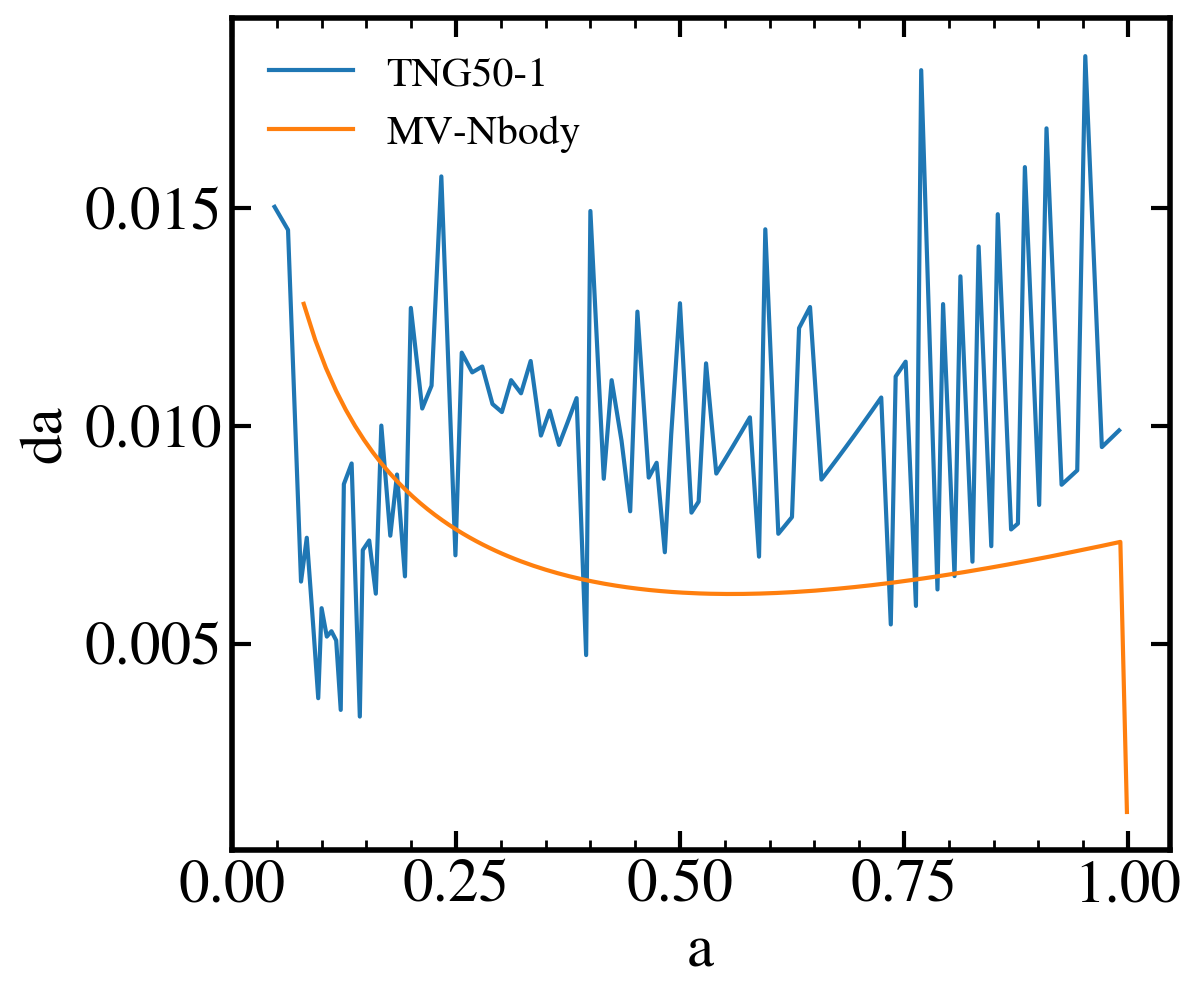

In [15]:
plt.figure(figsize=(6, 5))
plt.plot(aout_tng[:-1], np.diff(aout_tng), label=r"TNG50-1")
plt.plot(aout_nbody[:-1], np.diff(aout_nbody), label="MV-Nbody")
plt.xlabel("a")
plt.ylabel("da")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


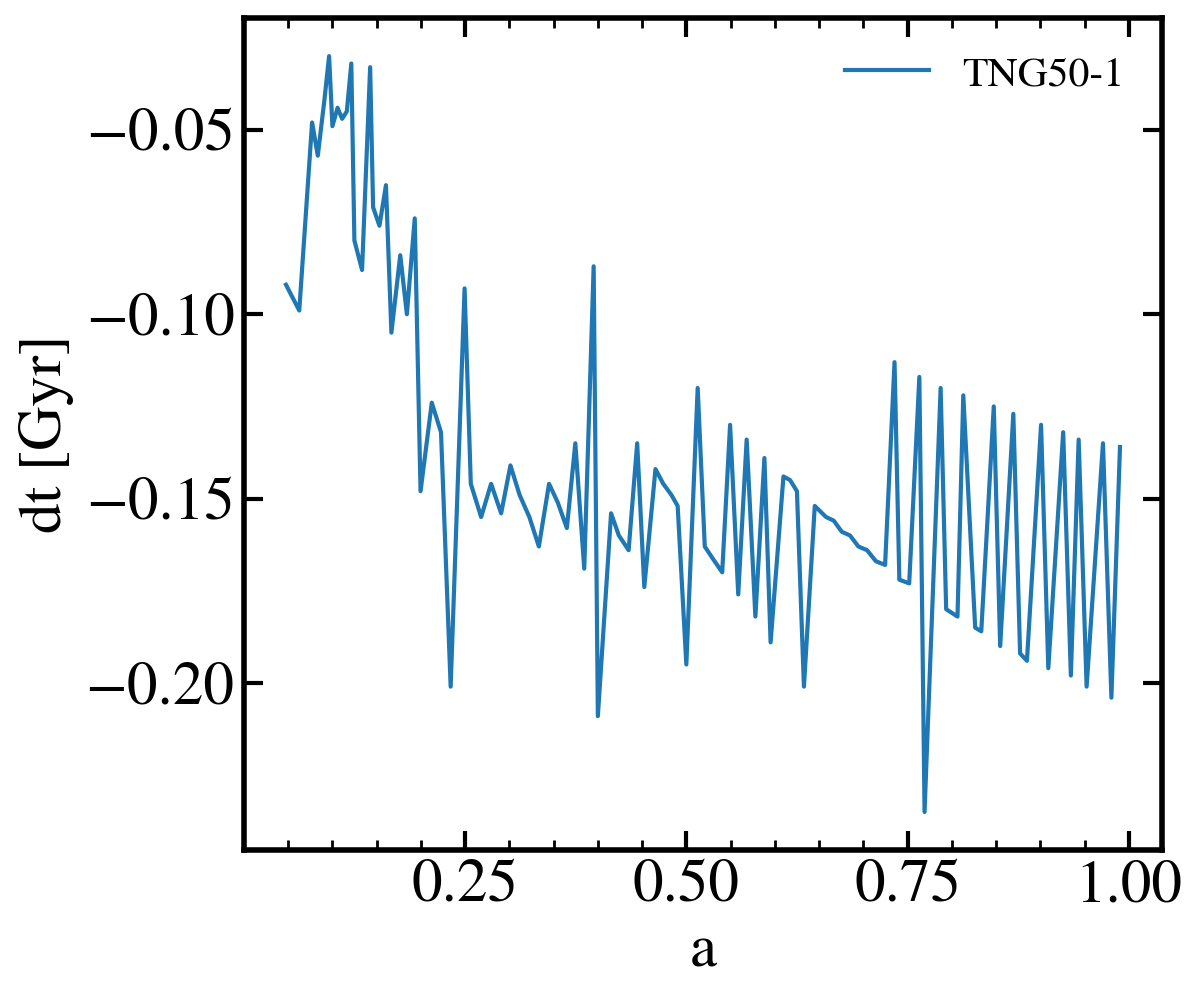

In [16]:
plt.figure(figsize=(6, 5))
plt.plot(aout_tng[:-1], np.diff(tout_tng), label=r"TNG50-1")
# plt.plot(aout_nbody[:-1], np.diff(t_nbody), label="MV-Nbody")
plt.xlabel("a")
plt.ylabel("dt [Gyr]")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

Let's calculate the `t_nbody` from the look-up table

# Look-up table

In [25]:
# load look-up table
fname_table = "../friedmann/time_table_cpl-1.0+0.0.csv"
table = pd.read_csv(fname_table, skiprows=4, delimiter=",", names=['t', 'tau0', 'tau1', 'a'])

In [26]:
table

,t,tau0,tau1,a
0,1.000000e-08,1.000000e-08,1.000000e-08,1.0
1,1.002005e-08,1.002005e-08,1.002005e-08,1.0
2,1.004014e-08,1.004014e-08,1.004014e-08,1.0
3,1.006028e-08,1.006028e-08,1.006028e-08,1.0
4,1.008045e-08,1.008045e-08,1.008045e-08,1.0
...,...,...,...,...
9995,NaN,4.960096e+00,NaN,NaN
9996,NaN,4.970042e+00,NaN,NaN
9997,NaN,4.980008e+00,NaN,NaN
9998,NaN,4.989994e+00,NaN,NaN


<IPython.core.display.Javascript object>


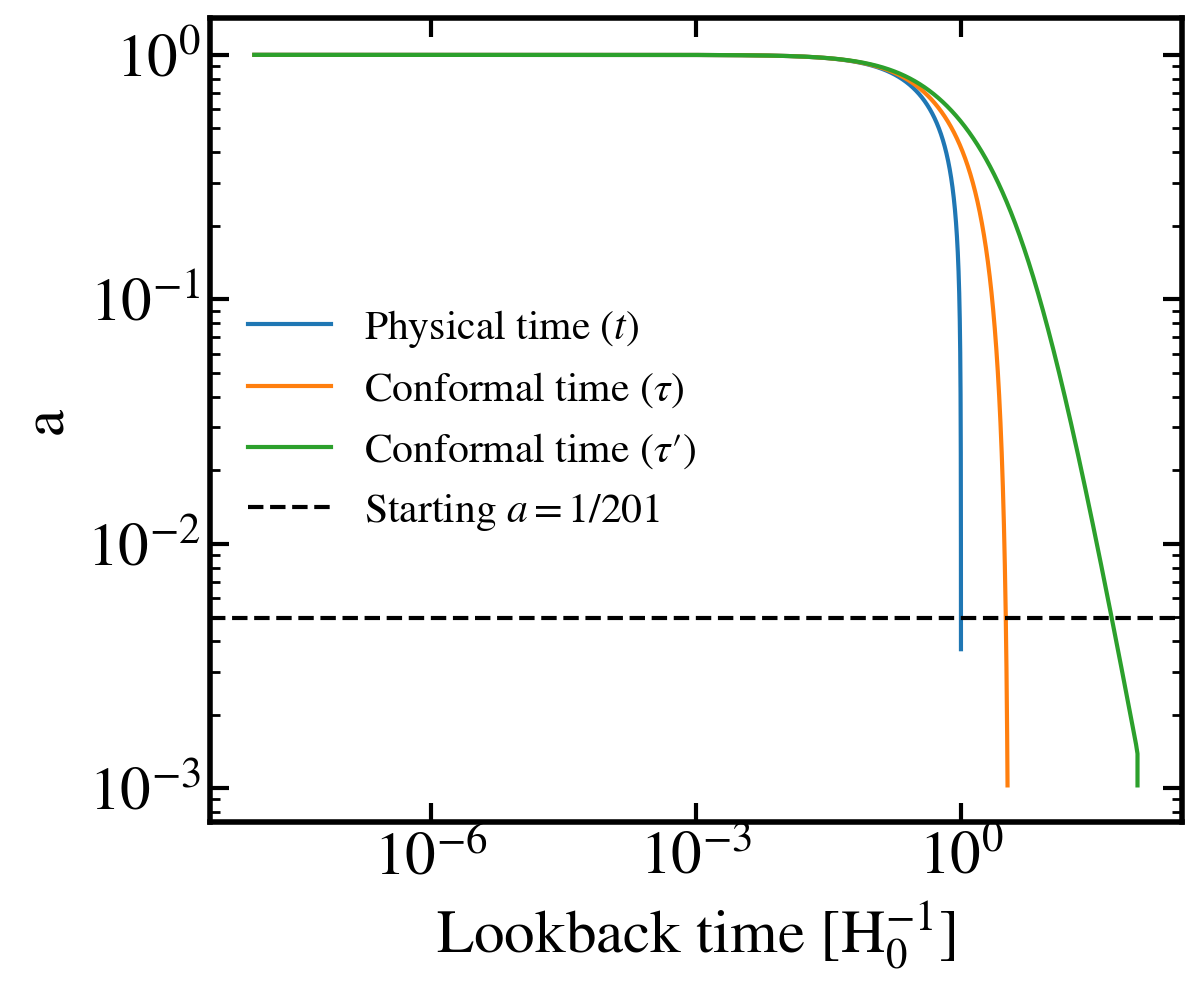

In [27]:
# quick check
plt.figure(figsize=(6, 5))
plt.plot(table['t'], table['a'], label=r"Physical time ($t$)")
plt.plot(table['tau0'], table['a'], label=r"Conformal time ($\tau$)")
plt.plot(table['tau1'], table['a'], label=r"Conformal time ($\tau\prime$)")

plt.axhline(aini, ls="--", c='k', label=r"Starting $a = $"+f"1/{zini+1:d}")

# for a in aout_nbody: plt.axhline(a, c='k', alpha=0.3)
# for a in aout_tng: plt.axhline(a, c='k', alpha=0.3)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Lookback time [H$_0^{-1}$]")
plt.ylabel("a")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

In [28]:
def is_monotonic(arr):
    
    is_increasing = np.all(np.diff(arr[~np.isnan(arr)]) > 0)
    is_decreasing = np.all(np.diff(arr[~np.isnan(arr)]) < 0)
    
    if is_increasing:
        return "Increasing"
    elif is_decreasing:
        return "Decreasing"
    else:
        
        return "Not Monotonic"

In [29]:
# Check the monotonic of values to use `np.interp` because `xp` should be increasing
keys = table.keys()
for i, key in enumerate(keys):
    print(f"{key:10} {is_monotonic(table[key])}")

t          Increasing
tau0       Increasing
tau1       Not Monotonic
a          Decreasing


In [30]:
table = table.dropna()
table

,t,tau0,tau1,a
0,1.000000e-08,1.000000e-08,1.000000e-08,1.000000
1,1.002005e-08,1.002005e-08,1.002005e-08,1.000000
2,1.004014e-08,1.004014e-08,1.004014e-08,1.000000
3,1.006028e-08,1.006028e-08,1.006028e-08,1.000000
4,1.008045e-08,1.008045e-08,1.008045e-08,1.000000
...,...,...,...,...
9782,1.002562e+00,3.237304e+00,5.352141e+01,0.004559
9783,1.002602e+00,3.243795e+00,5.498120e+01,0.004338
9784,1.002641e+00,3.250300e+00,5.651943e+01,0.004122
9785,1.002679e+00,3.256818e+00,5.814261e+01,0.003911


In [31]:
# Check the monotonic of values to use `np.interp` because `xp` should be increasing
keys = table.keys()
for i, key in enumerate(keys):
    print(f"{key:10} {is_monotonic(table[key])}")

t          Increasing
tau0       Increasing
tau1       Increasing
a          Decreasing


<IPython.core.display.Javascript object>


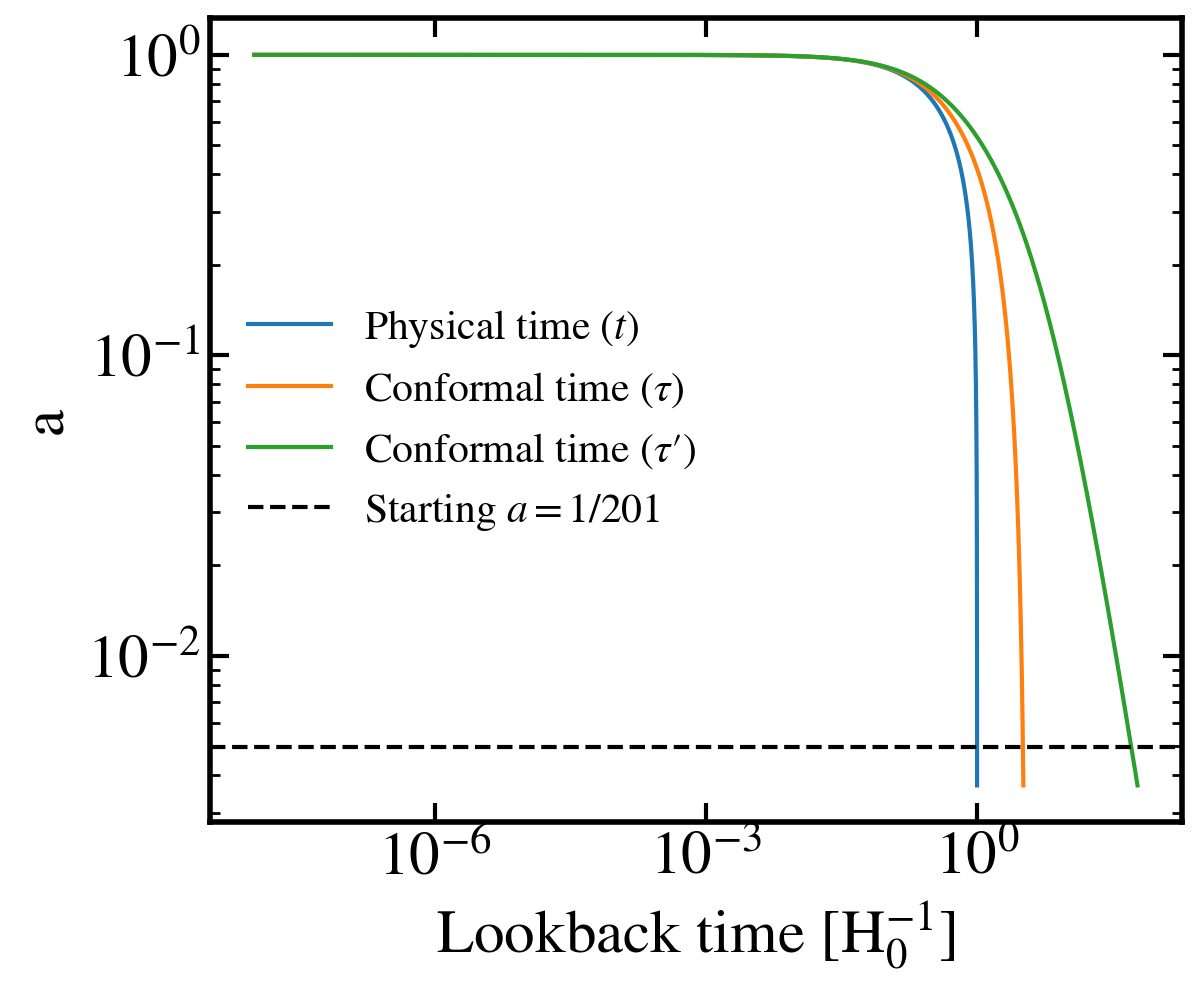

In [32]:
# quick check
plt.figure(figsize=(6, 5))
plt.plot(table['t'], table['a'], label=r"Physical time ($t$)")
plt.plot(table['tau0'], table['a'], label=r"Conformal time ($\tau$)")
plt.plot(table['tau1'], table['a'], label=r"Conformal time ($\tau\prime$)")

plt.axhline(aini, ls="--", c='k', label=r"Starting $a = $"+f"1/{zini+1:d}")

# for a in aout_nbody: plt.axhline(a, c='k', alpha=0.3)
# for a in aout_tng: plt.axhline(a, c='k', alpha=0.3)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Lookback time [H$_0^{-1}$]")
plt.ylabel("a")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

# Interpolate

<IPython.core.display.Javascript object>


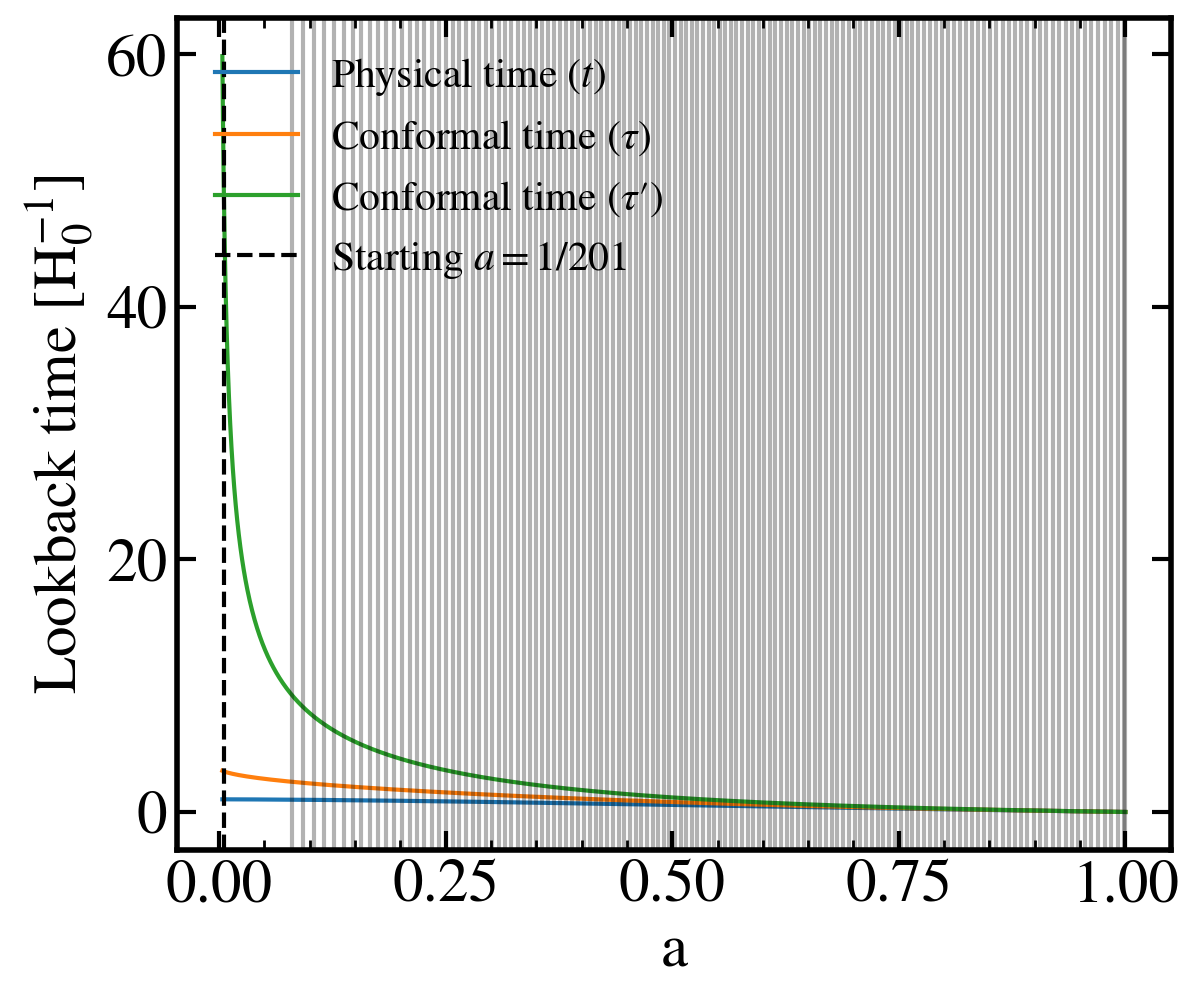

In [33]:
# quick check
plt.figure(figsize=(6, 5))
plt.plot(table['a'], table['t'], label=r"Physical time ($t$)")
plt.plot(table['a'], table['tau0'], label=r"Conformal time ($\tau$)")
plt.plot(table['a'], table['tau1'], label=r"Conformal time ($\tau\prime$)")

plt.axvline(aini, ls="--", c='k', label=r"Starting $a = $"+f"1/{zini+1:d}")

for a in aout_nbody: plt.axvline(a, c='k', alpha=0.3)
# for a in aout_tng: plt.axvline(a, c='k', alpha=0.3)

# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("a")
plt.ylabel(r"Lookback time [H$_0^{-1}$]")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

Now, let's find lookback time (`t_nbody`) at `aout_nbody` by interpolating the table

In [37]:
# sort values by a to use np.interp
table = table.sort_values(by='a').reset_index(drop=True)

In [38]:
table

,t,tau0,tau1,a
0,1.002716e+00,3.263348e+00,5.985783e+01,0.003706
1,1.002679e+00,3.256818e+00,5.814261e+01,0.003911
2,1.002641e+00,3.250300e+00,5.651943e+01,0.004122
3,1.002602e+00,3.243795e+00,5.498120e+01,0.004338
4,1.002562e+00,3.237304e+00,5.352141e+01,0.004559
...,...,...,...,...
9782,1.008045e-08,1.008045e-08,1.008045e-08,1.000000
9783,1.006028e-08,1.006028e-08,1.006028e-08,1.000000
9784,1.004014e-08,1.004014e-08,1.004014e-08,1.000000
9785,1.002005e-08,1.002005e-08,1.002005e-08,1.000000


In [39]:
keys = table.keys()
for i, key in enumerate(keys):
    print(f"{key:10} {is_monotonic(table[key])}")

t          Decreasing
tau0       Decreasing
tau1       Decreasing
a          Increasing


In [40]:
# Ensure aout_nbody values are within table['a'] range
if aout_nbody.min() < np.min(table['a']):
    print("Warning: aout_nbody contains values smaller than the minimum in table['a']")
if aout_nbody.max() > np.max(table['a']):
    print("Warning: aout_nbody contains values larger than the maximum in table['a']")

In [41]:
# Interpolate t, tau, and t_Gyr based on aout_nbody
t_nbody    = np.interp(aout_nbody, table['a'], table['t'])     # Interpolate t
tau0_nbody = np.interp(aout_nbody, table['a'], table['tau0'])  # Interpolate tau0
tau1_nbody = np.interp(aout_nbody, table['a'], table['tau1'])  # Interpolate tau1

In [42]:
t_nbody

array([9.73401151e-01, 9.66023414e-01, 9.58647730e-01, 9.51273811e-01,
       9.43901450e-01, 9.36530045e-01, 9.29159037e-01, 9.21787477e-01,
       9.14417389e-01, 9.07047448e-01, 8.99677519e-01, 8.92308341e-01,
       8.84939107e-01, 8.77570347e-01, 8.70201632e-01, 8.62833256e-01,
       8.55465021e-01, 8.48096922e-01, 8.40729002e-01, 8.33361396e-01,
       8.25993648e-01, 8.18626112e-01, 8.11258732e-01, 8.03891558e-01,
       7.96524424e-01, 7.89157351e-01, 7.81790391e-01, 7.74423575e-01,
       7.67056866e-01, 7.59690195e-01, 7.52323575e-01, 7.44957164e-01,
       7.37590772e-01, 7.30224344e-01, 7.22858015e-01, 7.15491970e-01,
       7.08125894e-01, 7.00759769e-01, 6.93393830e-01, 6.86027926e-01,
       6.78661896e-01, 6.71296140e-01, 6.63930305e-01, 6.56564747e-01,
       6.49198954e-01, 6.41833325e-01, 6.34467772e-01, 6.27102348e-01,
       6.19736925e-01, 6.12371411e-01, 6.05006143e-01, 5.97640928e-01,
       5.90275665e-01, 5.82910236e-01, 5.75545179e-01, 5.68180127e-01,
      

<IPython.core.display.Javascript object>


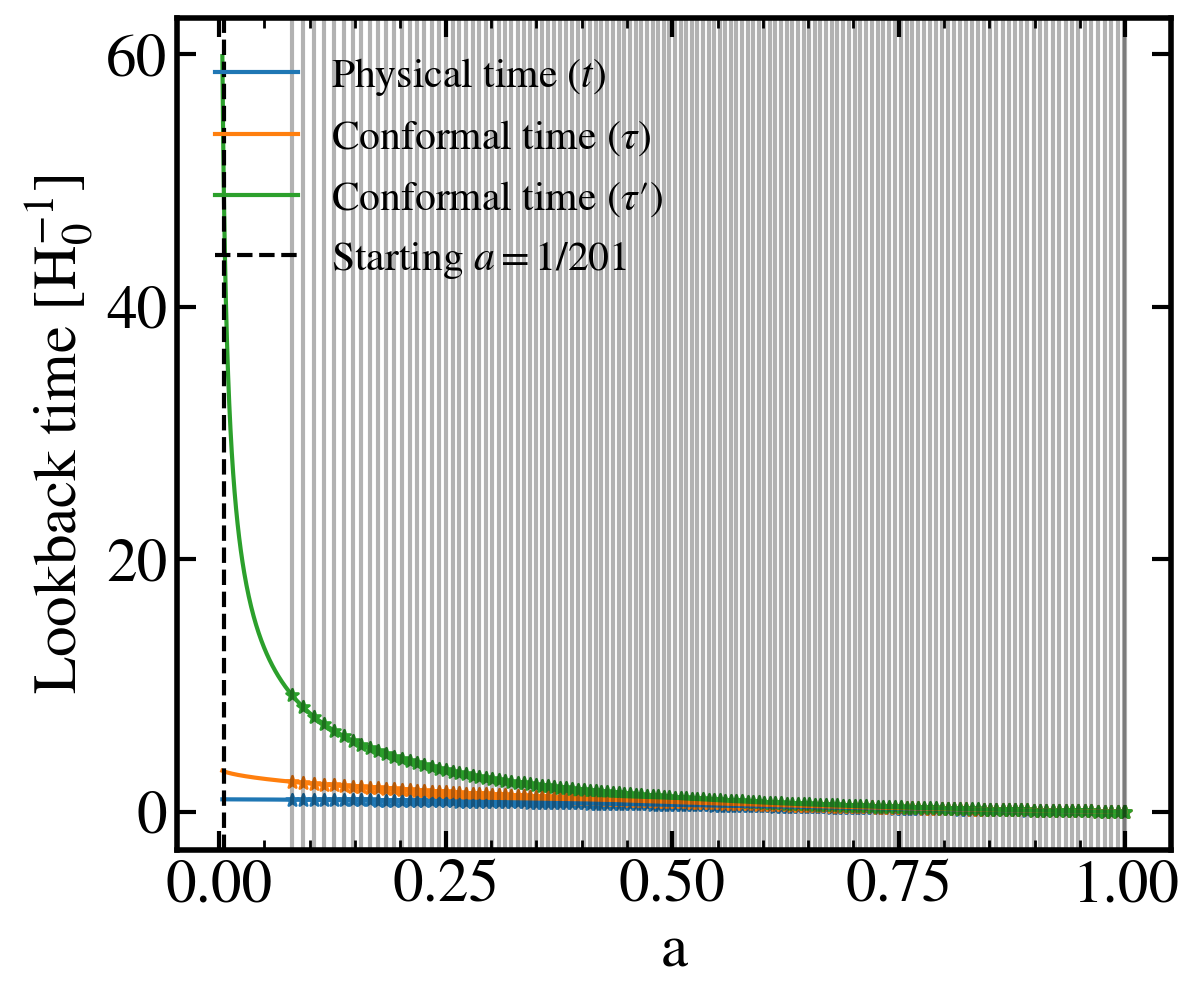

In [43]:
# quick check
plt.figure(figsize=(6, 5))
#table
plt.plot(table['a'], table['t'], label=r"Physical time ($t$)")
plt.plot(table['a'], table['tau0'], label=r"Conformal time ($\tau$)")
plt.plot(table['a'], table['tau1'], label=r"Conformal time ($\tau\prime$)")

#quick check for interpolated results
plt.scatter(aout_nbody, t_nbody, marker="*", s=20)
plt.scatter(aout_nbody, tau0_nbody, marker="*", s=20)
plt.scatter(aout_nbody, tau1_nbody, marker="*", s=20)

plt.axvline(aini, ls="--", c='k', label=r"Starting $a = $"+f"1/{zini+1:d}")

for a in aout_nbody: plt.axvline(a, c='k', alpha=0.3)
# for a in aout_tng: plt.axvline(a, c='k', alpha=0.3)

# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("a")
plt.ylabel(r"Lookback time [H$_0^{-1}$]")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


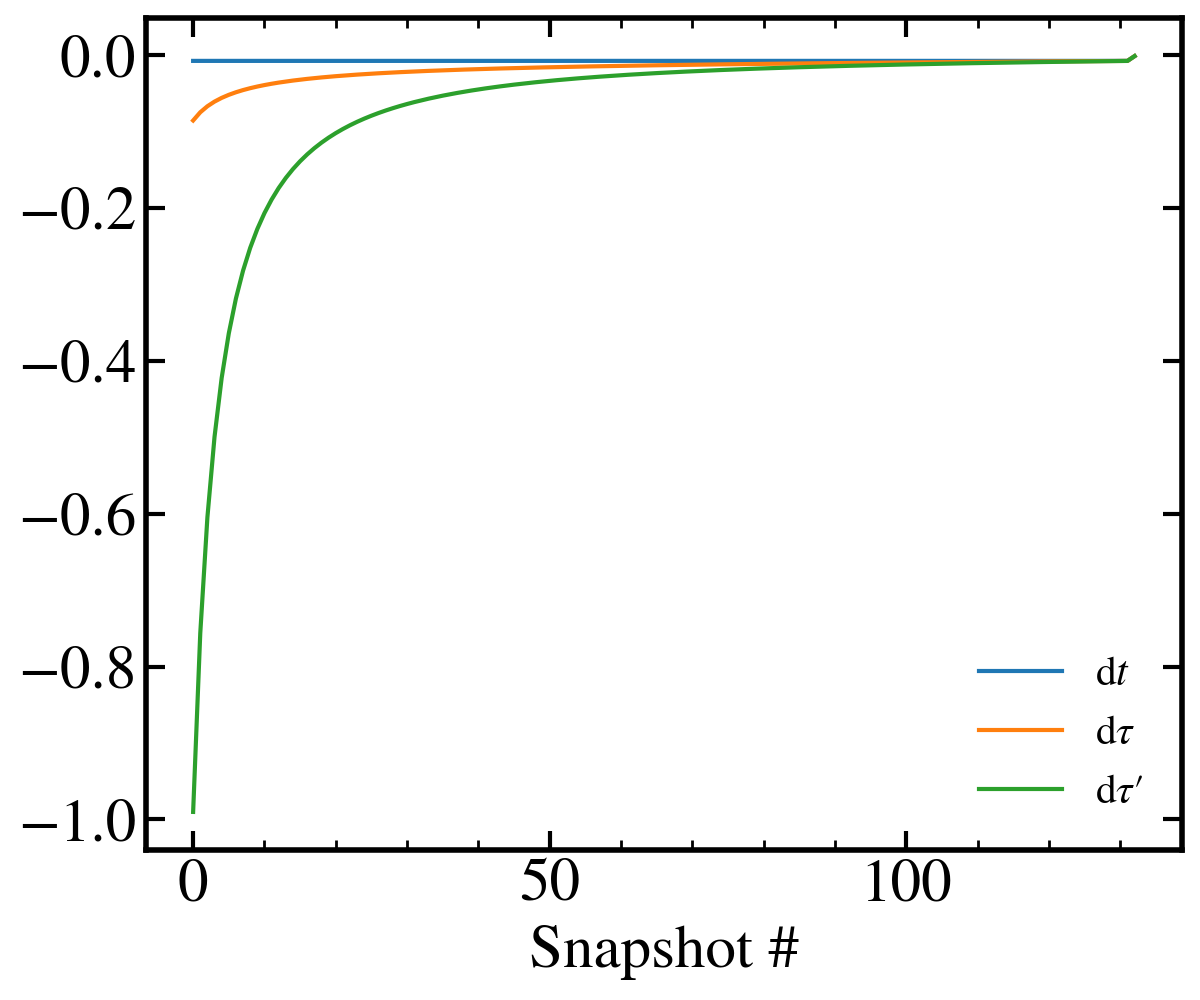

In [47]:
# check which one is the constant? dt? dtau? dtau'? or da?
plt.figure(figsize=(6, 5))
plt.plot(np.diff(t_nbody), label=r"d$t$")
plt.plot(np.diff(tau0_nbody), label=r"d$\tau$")
plt.plot(np.diff(tau1_nbody), label=r"d$\tau\prime$")
plt.xlabel("Snapshot #")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


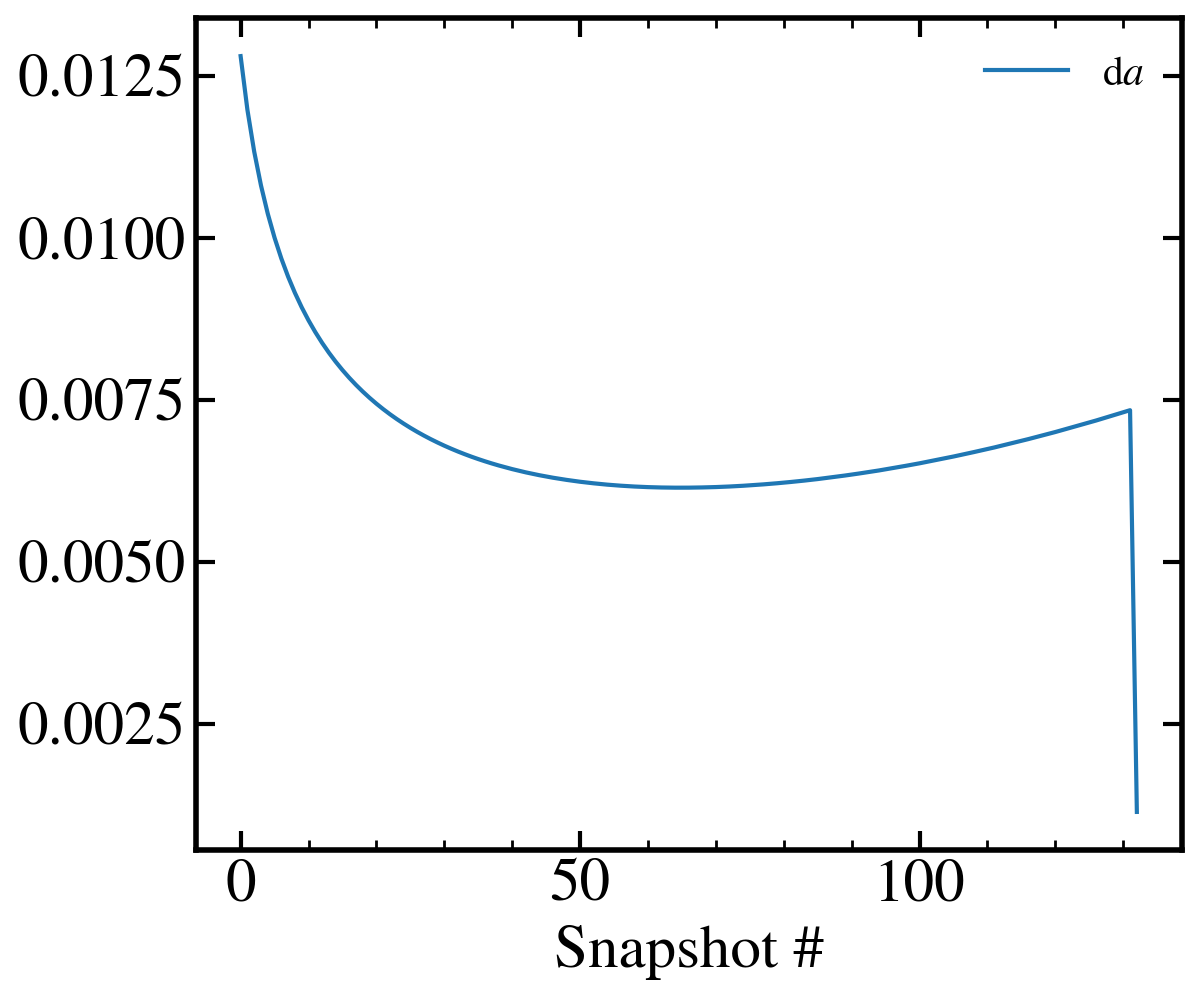

In [48]:
# check which one is the constant? dt? dtau? dtau'? or da?
plt.figure(figsize=(6, 5))
plt.plot(np.diff(aout_nbody), label=r"d$a$")
plt.xlabel("Snapshot #")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

maybe `dt` seems constant?

<IPython.core.display.Javascript object>


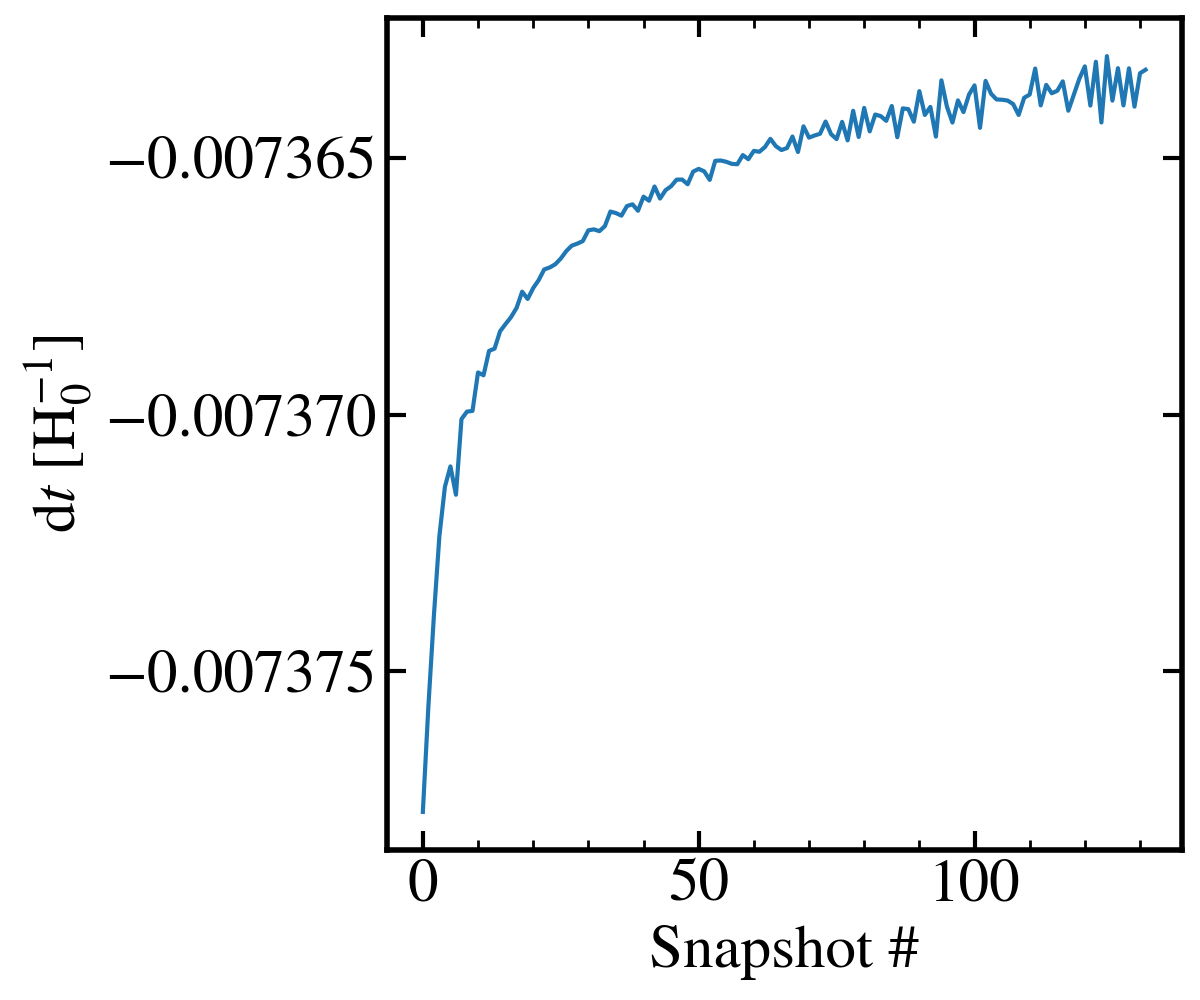

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [49]:
plt.figure(figsize=(6, 5))
plt.plot(np.diff(t_nbody[:-1])) # skip the last value
plt.xlabel("Snapshot #")
plt.ylabel(r"d$t$ [H$_0^{-1}$]")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


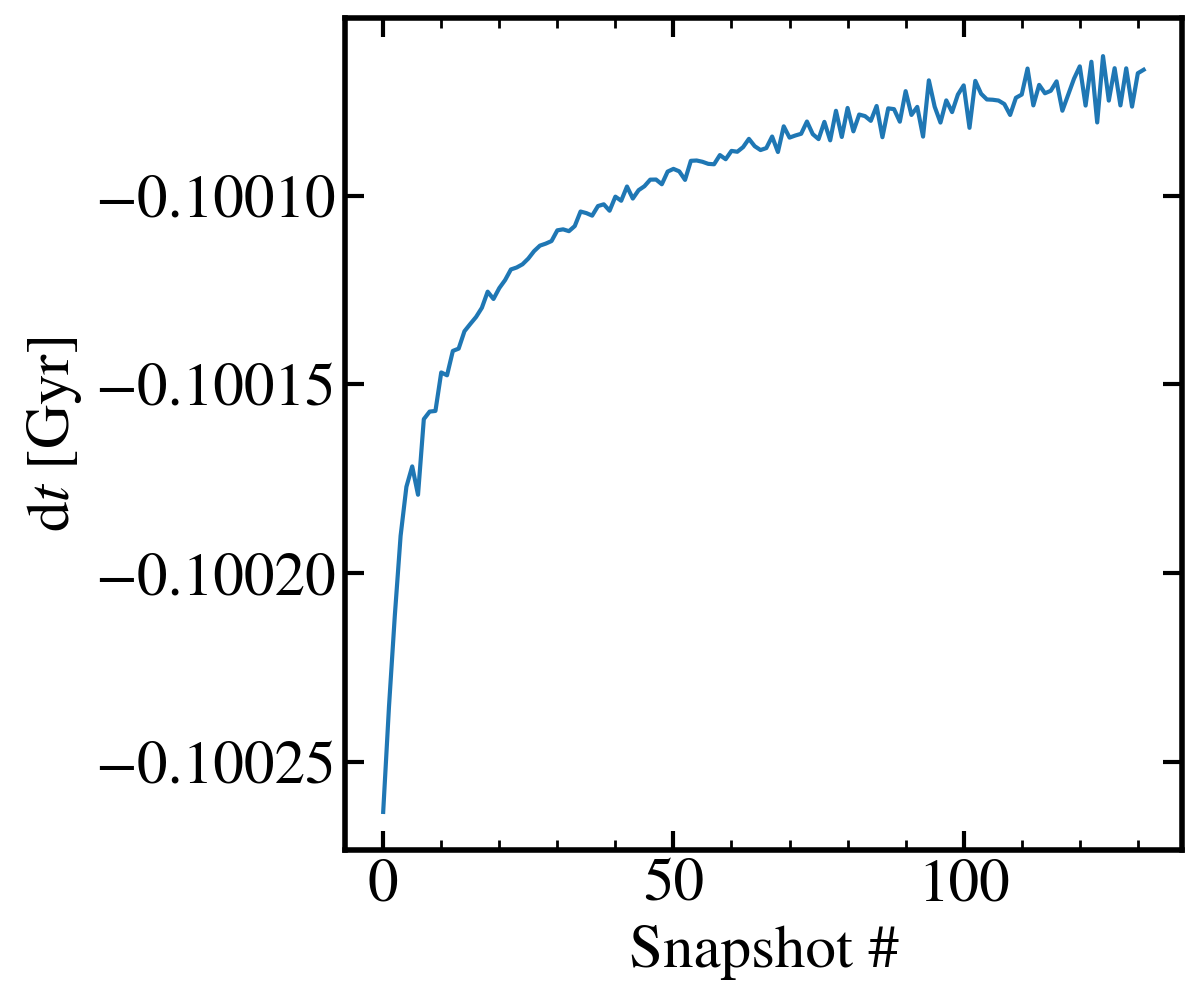

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [50]:
plt.figure(figsize=(6, 5))
plt.plot(np.diff(t_nbody[:-1]*unit_t)) # skip the last value
plt.xlabel("Snapshot #")
plt.ylabel(r"d$t$ [Gyr]")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

In [149]:
dt_tol = np.diff(t_nbody[:-1]*unit_t).max() - np.diff(t_nbody[:-1]*unit_t).min()
dt_tol

0.000200008966913523

<IPython.core.display.Javascript object>


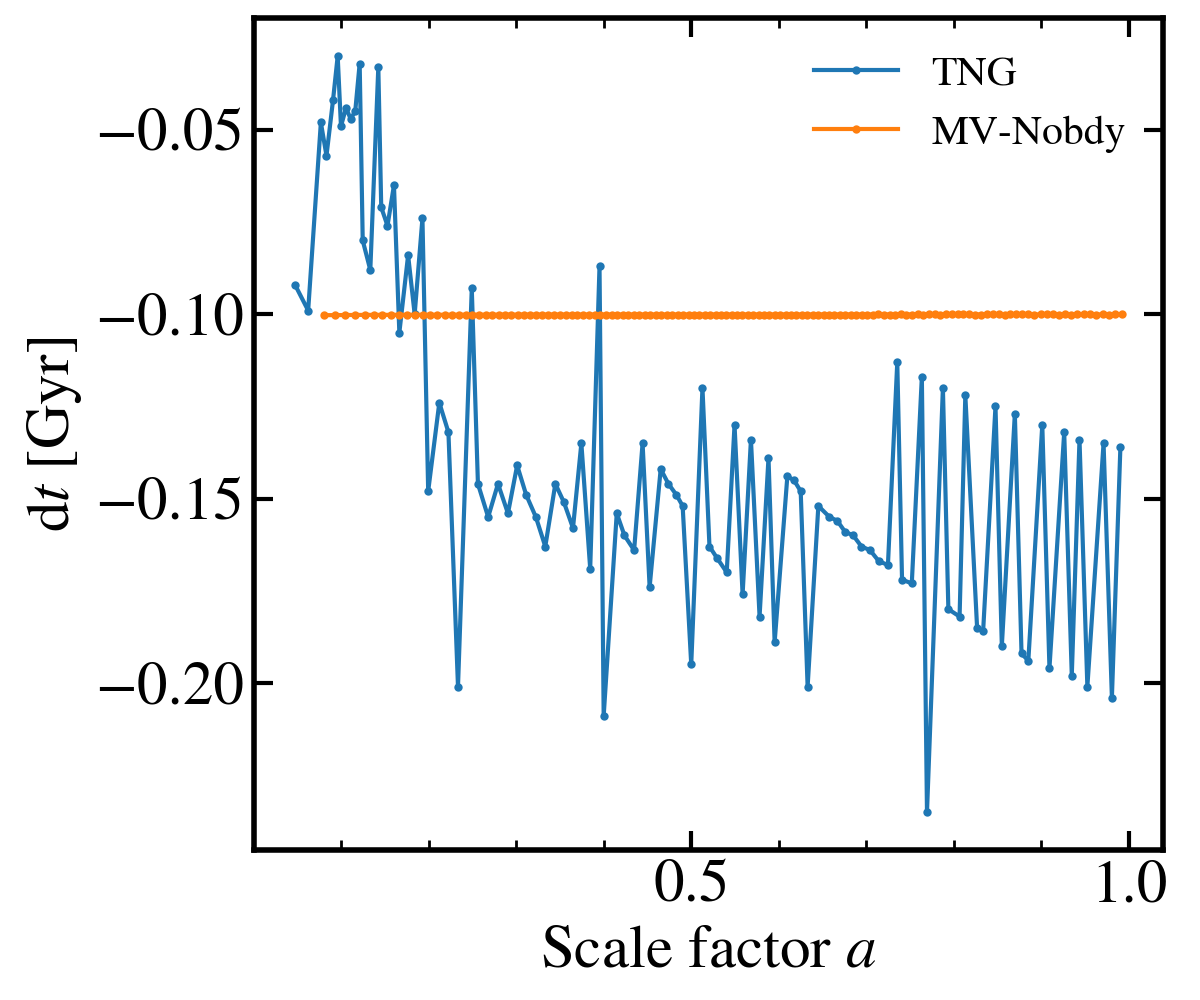

In [51]:
plt.figure(figsize=(6, 5))
plt.plot(aout_tng[:-1], np.diff(tout_tng), 'o-', ms=2, label="TNG") # skip the last value
plt.plot(aout_nbody[:-2], np.diff(t_nbody[:-1]*unit_t), 'o-', ms=2, label="MV-Nobdy") # skip the last value
plt.xlabel("Scale factor $a$")
plt.ylabel(r"d$t$ [Gyr]")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


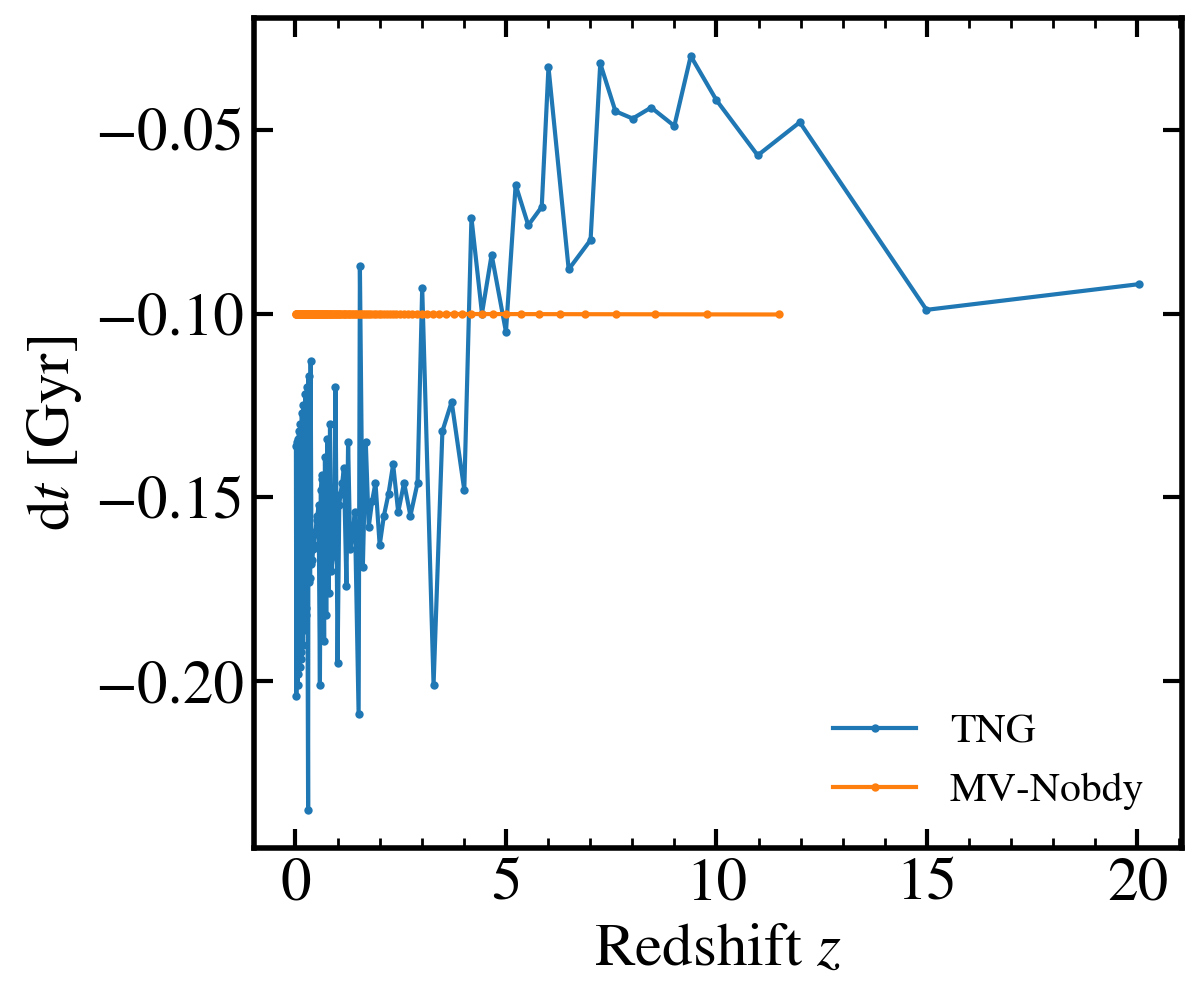

In [52]:
plt.figure(figsize=(6, 5))
plt.plot(zout_tng[:-1], np.diff(tout_tng), 'o-', ms=2, label="TNG") # skip the last value
plt.plot(zout_nbody[:-2], np.diff(t_nbody[:-1]*unit_t), 'o-', ms=2, label="MV-Nobdy") # skip the last value
plt.xlabel("Redshift $z$")
plt.ylabel(r"d$t$ [Gyr]")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

Conclusion:
- TNG: dt ~ 0.15 Myr 
- MV: dt ~ 0.10 Gyr

In [53]:
nbody_dic = {
    "z": zout_nbody,
    "a": aout_nbody,
    "t": t_nbody,
    "tau0": tau0_nbody,
    "tau1": tau1_nbody
}

In [54]:
nbody = pd.DataFrame(nbody_dic)

In [55]:
nbody

,z,a,t,tau0,tau1
0,11.490023,0.080064,9.734012e-01,2.392399e+00,9.291365e+00
1,9.767711,0.092870,9.660234e-01,2.307009e+00,8.301116e+00
2,8.537536,0.104849,9.586477e-01,2.232363e+00,7.544662e+00
3,7.607183,0.116182,9.512738e-01,2.165611e+00,6.939843e+00
4,6.874509,0.126992,9.439014e-01,2.104951e+00,6.440431e+00
...,...,...,...,...,...
129,0.023615,0.976930,2.323274e-02,2.350557e-02,2.378268e-02
130,0.016046,0.984207,1.586874e-02,1.599558e-02,1.612378e-02
131,0.008556,0.991517,8.505387e-03,8.541701e-03,8.578222e-03
132,0.001143,0.998858,1.142103e-03,1.142755e-03,1.143408e-03


# Add more points ($dt = 0.1$ Gyr)

In [56]:
n_add = 10 # number of additional points
t_nbody2 = np.zeros(len(t_nbody) + n_add) # extended points
t_nbody2[:len(t_nbody)] = t_nbody[::-1]
for i in range(n_add):
    t_nbody2[len(t_nbody)+i] = t_nbody[0] + (i + 1) * 0.1 / unit_t
t_nbody2 = t_nbody2[::-1]

In [60]:
t_nbody2[:n_add+1], t_nbody[0]

(array([1.04698491, 1.03962653, 1.03226816, 1.02490978, 1.01755141,
        1.01019303, 1.00283465, 0.99547628, 0.9881179 , 0.98075953,
        0.97340115]),
 0.9734011508665232)

In [61]:
t_nbody2 = t_nbody2[t_nbody2 < age1] # cut out beyond the age of the Universe
t_nbody2 = t_nbody2[t_nbody2 < table['t'].max()] # cut out beyond the lookup table

In [62]:
# now find smaller `a` values corresponding to smaller `t` added to `t_nbody2`

<IPython.core.display.Javascript object>


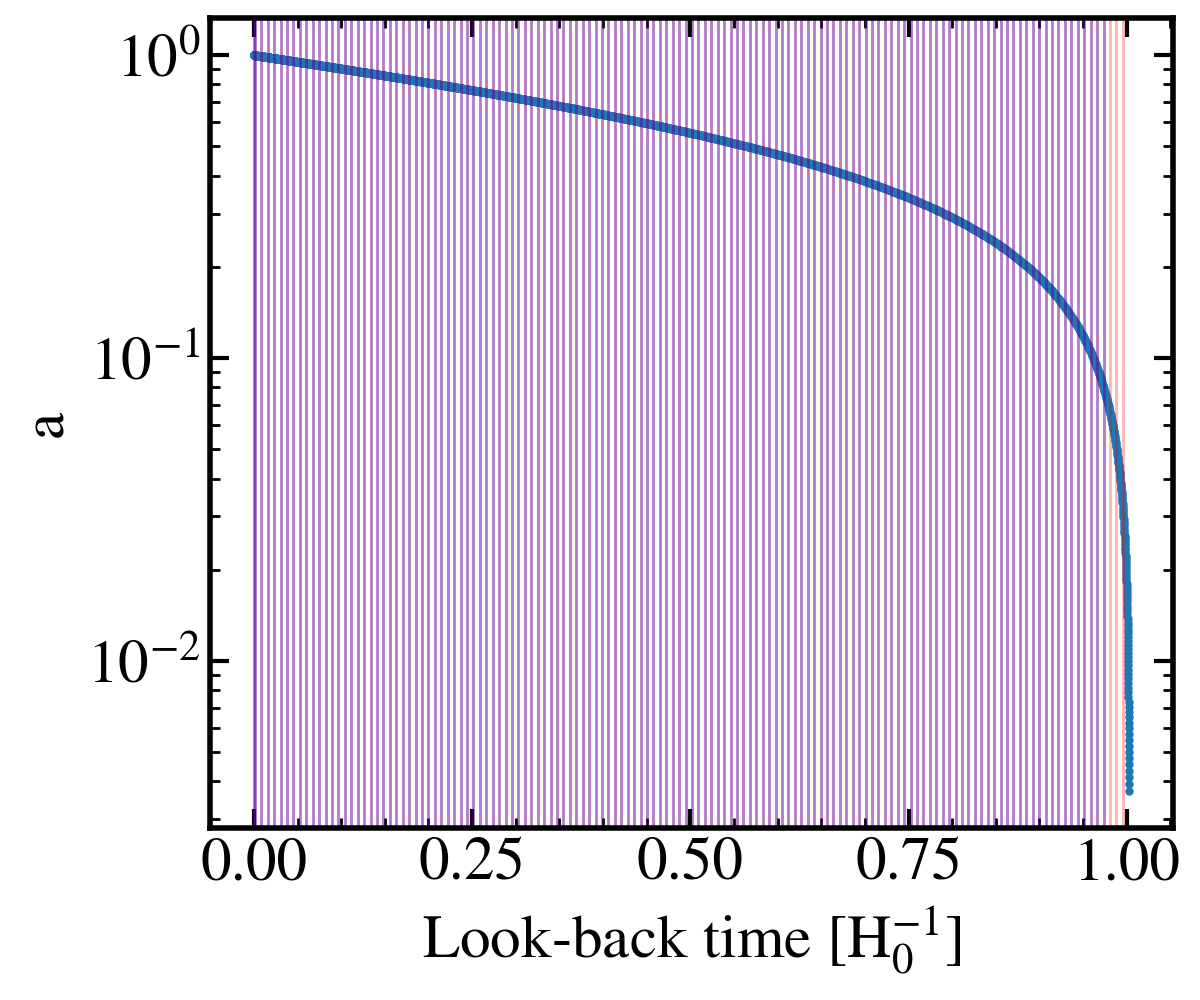

In [68]:
plt.figure(figsize=(6, 5))
plt.plot(table['t'], table['a'], 'o-', ms=2)

# plt.axvline(age1)
for t in t_nbody2: plt.axvline(t, lw=1, alpha=0.3, c='r')
for t in t_nbody:  plt.axvline(t, lw=1, alpha=0.3, c='b')
    
# plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Look-back time [H$_0^{-1}$]")
plt.ylabel("a")
plt.tight_layout(pad=0.3)

In [69]:
is_monotonic(table['t'])

'Decreasing'

In [74]:
# Interpolate a based on t
a_nbody2 = np.interp(t_nbody2, table['t'][::-1], table['a'][::-1]) # Interpolate t
z_nbody2 = 1/a_nbody2 - 1

<IPython.core.display.Javascript object>


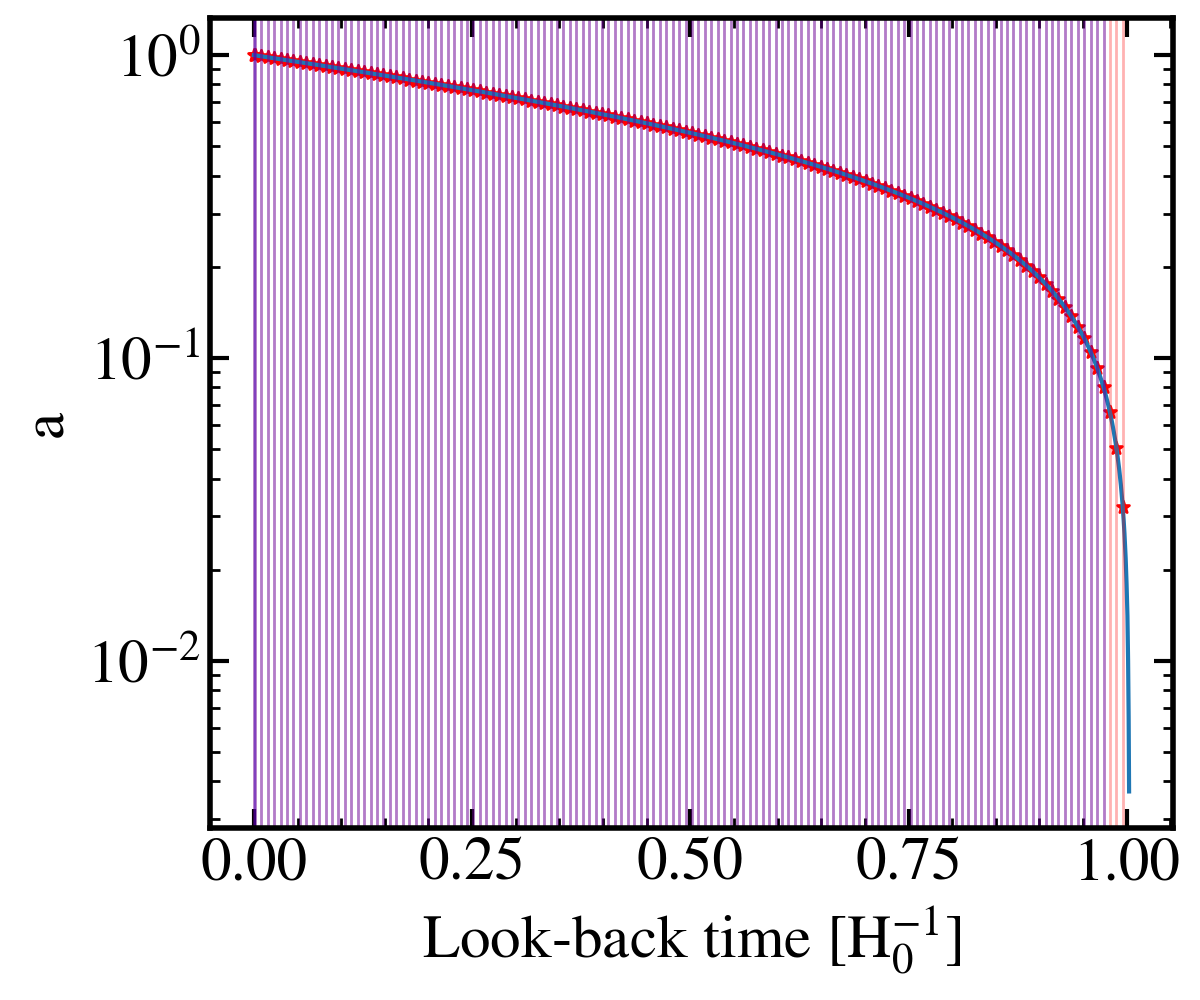

In [73]:
plt.figure(figsize=(6, 5))
plt.plot(table['t'], table['a'], ms=2)
plt.scatter(t_nbody2, a_nbody2, marker="*", c='r', s=20)

# plt.axvline(age1)
for t in t_nbody2: plt.axvline(t, lw=1, alpha=0.3, c='r')
for t in t_nbody:  plt.axvline(t, lw=1, alpha=0.3, c='b')
    
# plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Look-back time [H$_0^{-1}$]")
plt.ylabel("a")
plt.tight_layout(pad=0.3)

In [81]:
z_nbody2[:n_add], zout_nbody[0]

(array([30.11897174, 18.75159056, 14.1121732 , 11.490023  ,  9.767711  ,
         8.537536  ,  7.607183  ,  6.874509  ,  6.279815  ,  5.785675  ]),
 11.490023)

Only 3 points are added. Let's just add the points by hand.

# Add more points (by hand)

In [116]:
zput = np.array([20, 18, 15, 14, 13, 12, \
                 5, 4, 3, 2, 1, 0.7, 0.5, 0.2, 0.1])
aput = 1/(zput+1)

In [118]:
table.keys()

Index(['t', 'tau0', 'tau1', 'a'], dtype='object')

In [119]:
is_monotonic(table['a'])

'Increasing'

In [161]:
t_put = np.interp(aput, table['a'], table['t'])
tau0_put = np.interp(aput, table['a'], table['tau0'])
tau1_put = np.interp(aput, table['a'], table['tau1'])

In [159]:
# Header 출력
print(f"{'z':>5}\t{'zclose':>10}\t{'dt[Gyr]':>10}")

dt_tol  = np.diff(t_nbody[:-1]*unit_t).max() - np.diff(t_nbody[:-1]*unit_t).min()
dt_tol2 = 0.001 # 1 Myr

# Body 출력
for i, z in enumerate(zput):
    diff_z = abs(zout_nbody - z)
    j = np.argmin(diff_z)  # 가장 가까운 값의 인덱스
    diff_t = (t_nbody[j] - t_put[i])*unit_t
    
    result = f"{z:5.2f}\t{zout_nbody[j]:10.5f}\t{(diff_t * unit_t):10.5f}"
    
    if abs(diff_t) < dt_tol2: 
        print(result + "\tgood")
    else: 
        print(result + "\tbad")

    z	    zclose	   dt[Gyr]
20.00	  11.49002	  -2.95884	bad
18.00	  11.49002	  -2.55214	bad
15.00	  11.49002	  -1.69638	bad
14.00	  11.49002	  -1.31287	bad
13.00	  11.49002	  -0.85928	bad
12.00	  11.49002	  -0.31832	bad
 5.00	   5.00772	   0.03143	bad
 4.00	   3.95518	  -0.29039	bad
 3.00	   2.99930	  -0.00779	good
 2.00	   1.97275	  -0.60881	bad
 1.00	   1.01232	   0.67310	bad
 0.70	   0.69699	  -0.23086	bad
 0.50	   0.49301	  -0.68006	bad
 0.20	   0.20361	   0.50897	bad
 0.10	   0.10395	   0.63405	bad


Just put all points

<IPython.core.display.Javascript object>


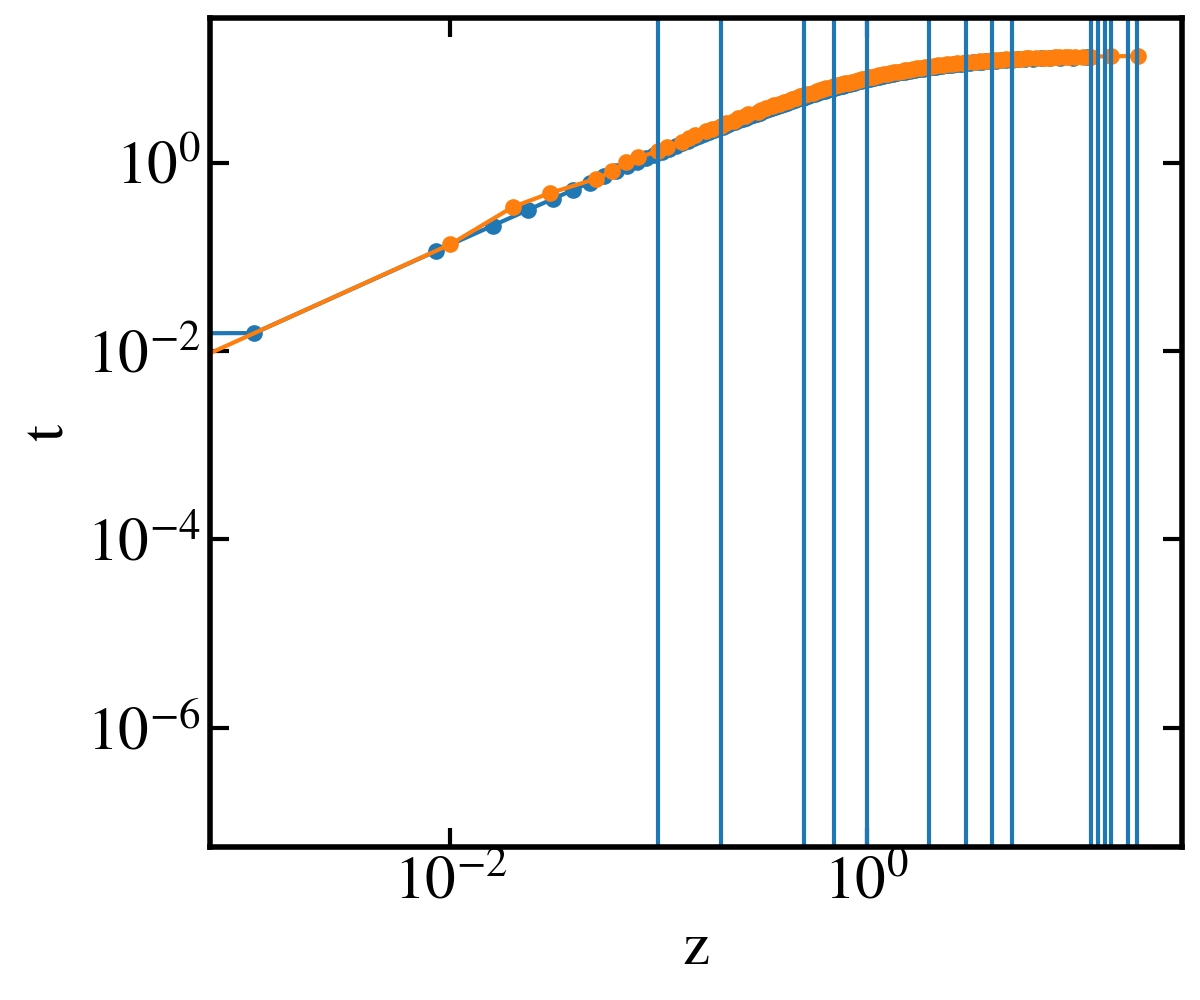

In [160]:
plt.figure(figsize=(6, 5))
plt.plot(zout_nbody, t_nbody*unit_t, 'o-', ms=5)
plt.plot(zout_tng, tout_tng, 'o-', ms=5)

for z in zput:
    plt.axvline(z)

plt.xscale('log')
plt.yscale('log')

plt.xlabel("z")
plt.ylabel("t")

plt.tight_layout(pad=0.3)

In [162]:
nbody

,z,a,t,tau0,tau1
0,11.490023,0.080064,9.734012e-01,2.392399e+00,9.291365e+00
1,9.767711,0.092870,9.660234e-01,2.307009e+00,8.301116e+00
2,8.537536,0.104849,9.586477e-01,2.232363e+00,7.544662e+00
3,7.607183,0.116182,9.512738e-01,2.165611e+00,6.939843e+00
4,6.874509,0.126992,9.439014e-01,2.104951e+00,6.440431e+00
...,...,...,...,...,...
129,0.023615,0.976930,2.323274e-02,2.350557e-02,2.378268e-02
130,0.016046,0.984207,1.586874e-02,1.599558e-02,1.612378e-02
131,0.008556,0.991517,8.505387e-03,8.541701e-03,8.578222e-03
132,0.001143,0.998858,1.142103e-03,1.142755e-03,1.143408e-03


In [166]:
put_dic = {
    "z" : zput,
    "a" : aput,
    "t" : t_put,
    "tau0" : tau0_put,
    "tau1" : tau1_put
}

In [169]:
nbody3 = pd.DataFrame(put_dic)
nbody3

,z,a,t,tau0,tau1
0,20.0,0.047619,0.989422,2.646228,13.402497
1,18.0,0.052632,0.987220,2.602311,12.525088
2,15.0,0.062500,0.982586,2.521597,11.117877
3,14.0,0.066667,0.980510,2.489450,10.619806
4,13.0,0.071429,0.978054,2.453922,10.104984
5,12.0,0.076923,0.975125,2.414373,9.571439
6,5.0,0.166667,0.914247,1.902345,5.047673
7,4.0,0.200000,0.886511,1.750838,4.217766
8,3.0,0.250000,0.840771,1.547087,3.306385
9,2.0,0.333333,0.755620,1.253939,2.290205


In [178]:
multiverse = pd.concat([nbody, nbody3])

In [179]:
multiverse

,z,a,t,tau0,tau1
0,11.490023,0.080064,0.973401,2.392399,9.291365
1,9.767711,0.092870,0.966023,2.307009,8.301116
2,8.537536,0.104849,0.958648,2.232363,7.544662
3,7.607183,0.116182,0.951274,2.165611,6.939843
4,6.874509,0.126992,0.943901,2.104951,6.440431
...,...,...,...,...,...
10,1.000000,0.500000,0.564536,0.790647,1.151521
11,0.700000,0.588235,0.458957,0.596197,0.792603
12,0.500000,0.666667,0.365652,0.447275,0.554601
13,0.200000,0.833333,0.175114,0.191841,0.210748


In [180]:
multiverse = multiverse.sort_values(by='a').reset_index(drop=True)

In [181]:
multiverse

,z,a,t,tau0,tau1
0,20.000000,0.047619,9.894220e-01,2.646228e+00,1.340250e+01
1,18.000000,0.052632,9.872199e-01,2.602311e+00,1.252509e+01
2,15.000000,0.062500,9.825863e-01,2.521597e+00,1.111788e+01
3,14.000000,0.066667,9.805098e-01,2.489450e+00,1.061981e+01
4,13.000000,0.071429,9.780538e-01,2.453922e+00,1.010498e+01
...,...,...,...,...,...
144,0.023615,0.976930,2.323274e-02,2.350557e-02,2.378268e-02
145,0.016046,0.984207,1.586874e-02,1.599558e-02,1.612378e-02
146,0.008556,0.991517,8.505387e-03,8.541701e-03,8.578222e-03
147,0.001143,0.998858,1.142103e-03,1.142755e-03,1.143408e-03


In [188]:
multiverse.iloc[-1, :]

z       0.000000e+00
a       1.000000e+00
t       1.000000e-08
tau0    1.000000e-08
tau1    1.000000e-08
Name: 148, dtype: float64

In [189]:
multiverse.iloc[-1, :] = {
    "z":0,
    "a":1,
    "t":0,
    "tau0":0,
    "tau1":0
}

In [190]:
multiverse

,z,a,t,tau0,tau1
0,20.000000,0.047619,0.989422,2.646228,13.402497
1,18.000000,0.052632,0.987220,2.602311,12.525088
2,15.000000,0.062500,0.982586,2.521597,11.117877
3,14.000000,0.066667,0.980510,2.489450,10.619806
4,13.000000,0.071429,0.978054,2.453922,10.104984
...,...,...,...,...,...
144,0.023615,0.976930,0.023233,0.023506,0.023783
145,0.016046,0.984207,0.015869,0.015996,0.016124
146,0.008556,0.991517,0.008505,0.008542,0.008578
147,0.001143,0.998858,0.001142,0.001143,0.001143


In [194]:
multiverse['a'].values

array([0.04761905, 0.05263158, 0.0625    , 0.06666667, 0.07142857,
       0.07692308, 0.0800639 , 0.09287025, 0.10484888, 0.11618203,
       0.12699204, 0.13736613, 0.14736927, 0.15705155, 0.16645261,
       0.16666667, 0.17560453, 0.18453375, 0.19326237, 0.2       ,
       0.20180922, 0.21019041, 0.21841982, 0.22650975, 0.23447088,
       0.24231275, 0.25      , 0.25004395, 0.25767212, 0.26520415,
       0.27264627, 0.28000428, 0.28728335, 0.29448836, 0.30162373,
       0.30869352, 0.31570151, 0.32265132, 0.32954619, 0.33333333,
       0.33638932, 0.34318338, 0.3499314 , 0.35663567, 0.36329883,
       0.3699229 , 0.37651028, 0.38306295, 0.38958287, 0.39607192,
       0.40253193, 0.40896433, 0.41537106, 0.42175336, 0.42811316,
       0.43445148, 0.4407698 , 0.44706944, 0.4533517 , 0.45961797,
       0.46586904, 0.47210631, 0.47833089, 0.48454402, 0.49074624,
       0.49693886, 0.5       , 0.50312288, 0.5092993 , 0.51546897,
       0.52163263, 0.52779138, 0.53394588, 0.54009708, 0.54624

Put this values into `box.nml`

In [195]:
aout = multiverse['a']

In [200]:
aout_str = ""
for a in aout:
    aout_str += f"{a:.8f},"

In [201]:
aout_str

'0.04761905,0.05263158,0.06250000,0.06666667,0.07142857,0.07692308,0.08006390,0.09287025,0.10484888,0.11618203,0.12699204,0.13736613,0.14736927,0.15705155,0.16645261,0.16666667,0.17560453,0.18453375,0.19326237,0.20000000,0.20180922,0.21019041,0.21841982,0.22650975,0.23447088,0.24231275,0.25000000,0.25004395,0.25767212,0.26520415,0.27264627,0.28000428,0.28728335,0.29448836,0.30162373,0.30869352,0.31570151,0.32265132,0.32954619,0.33333333,0.33638932,0.34318338,0.34993140,0.35663567,0.36329883,0.36992290,0.37651028,0.38306295,0.38958287,0.39607192,0.40253193,0.40896433,0.41537106,0.42175336,0.42811316,0.43445148,0.44076980,0.44706944,0.45335170,0.45961797,0.46586904,0.47210631,0.47833089,0.48454402,0.49074624,0.49693886,0.50000000,0.50312288,0.50929930,0.51546897,0.52163263,0.52779138,0.53394588,0.54009708,0.54624571,0.55239249,0.55853846,0.56468430,0.57083067,0.57697811,0.58312778,0.58823529,0.58927971,0.59543516,0.60159459,0.60775865,0.61392781,0.62010312,0.62628506,0.63247386,0.6386707